In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import networkx as nx
from collections import Counter
import time
import sys
from random import randrange
from datetime import timedelta
import datetime
import os

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
print("Python version - ",sys.version_info)

Python version -  sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)


# Call Network & Graph Creation

In [4]:
start=time.clock()
col_names = ['Caller','Callee', 'Duration']
calls = pd.read_csv('C:/Users/sumith.singh/A_SUBEX/Diffusion/data/sumit_onnet.csv',header=None, names = col_names, dtype={"Caller": object, "Callee": object, "Duration": object})
print("Time taken to read the csv file = ",time.clock() - start)

Time taken to read the csv file =  2.8100521801926837


In [5]:
calls1 = calls[['Caller','Callee']]
print("Time taken to get two columns from the csv file = ",time.clock() - start)
print(calls1.sample(5));

Time taken to get two columns from the csv file =  2.941648665593302
               Caller        Callee
2304204  254771912481  254772547002
2066866  254773129907  254776733820
513267   254770536651  254772199443
2870316  254771465001  254770830755
531728   254775428142  254773160516


In [6]:
print("Any values null in calls ? -> ",calls1.isnull().values.any())

Any values null in calls ? ->  False


In [7]:
calls1.dropna()
#calls2.shape
print("Time taken to get to drop nas = ",time.clock() - start)
print("Any values null in calls ? -> ",calls1.isnull().values.any())

Time taken to get to drop nas =  7.597928660036066
Any values null in calls ? ->  False


In [8]:
Node1 = calls1.Caller
Node2 = calls1.Callee
#type(Node1)

In [9]:
print("The size of callers - ",Node1.size)
print("The size of callees - ",Node2.size)

NodeC = pd.concat([Node1,Node2]).reset_index(drop=True).unique()
print("The size of caller+callee - ",Node.size)
print("Time taken to concat+unique callers and callee ->",time.clock()-start)


The size of callers -  3003910
The size of callees -  3003910


NameError: name 'Node' is not defined

In [11]:
G = nx.Graph()
k = len(calls)
k2 = len(calls1)
G.add_edges_from(zip(Node1,Node2))
print("Time take to calculate the Graph =========>",time.clock()-start)
print("Neighbours of node 254771980130 are - ",list(G.neighbors('254771980130')))
print("Time take to calculate neighbours of a given node =====>",time.clock()-start)
max_nbrs = 0
max_node = 0

Time take to calculate the Graph =========> 32.08176154519381
Neighbours of node 254771980130 are -  ['254775770755', '254776442060']
Time take to calculate neighbours of a given node =====> 32.08211698264633


In [12]:
for element in G.nodes():
    if len(list(G.neighbors(element))) > max_nbrs:
        max_nbrs = len(list(G.neighbors(element)))
        max_node = element
print("The node with maximum number of neighbor is: ", max_node)
print("The neighbors are: ", list(G.neighbors(max_node)))
print("The number of neighbors is: ", len(list(G.neighbors(max_node))))
print("Time taken to get node with maximum number of neighbors =======>",time.clock()-start)

degrees = [len(list(G.neighbors(n))) for n in G.nodes()]
deg_cent = nx.degree_centrality(G)
print("Time taken to find degree centrality of all nodes ====>",time.clock()-start)




#plt.scatter(degrees, list(deg_cent.values()))
#plt.show()


The node with maximum number of neighbor is:  254202221000
The neighbors are:  ['254770309452', '254770634250', '254770767708', '254771198894', '254771357694', '254771440178', '254771771307', '254772297362', '254772319948', '254772423899', '254772538252', '254772910590', '254773013545', '254773037826', '254773053909', '254773088952', '254773498201', '254773519962', '254773690857', '254773770184', '254774200001', '254774513416', '254774727537', '254774861435', '254775018773', '254775291827', '254775546560', '254775615161', '254775752625', '254775786737', '254775953833', '254776062248', '254776093205', '254776102488', '254776385322', '254776408014', '254776466031', '254776591481', '254776643655', '254776673437', '254776699664', '254776881441', '254776890475', '254776927780', '254776931309', '254202641038', '254207855088', '254770136098', '254770431187', '254770559437', '254770580648', '254770665154', '254770779067', '254770785895', '254771381352', '254771786201', '254771889128', '2547720

The number of neighbors is:  24243
Time taken to get node with maximum number of neighbors =======> 33.51207006349213
Time taken to find degree centrality of all nodes ====> 35.73890791842711


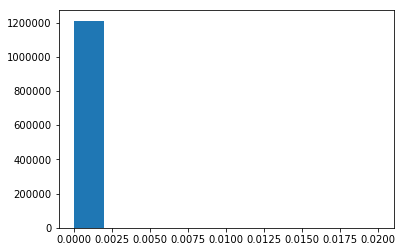

In [13]:
plt.hist(list(deg_cent.values()))
plt.show()

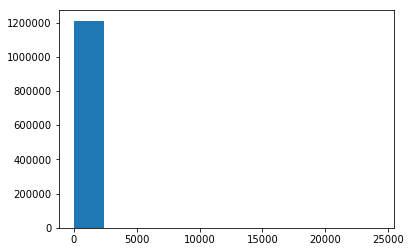

In [14]:
plt.hist(degrees)
plt.show()

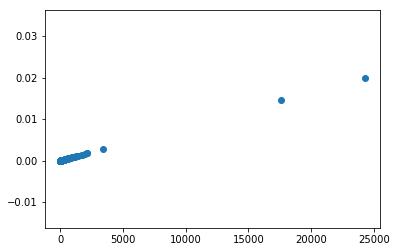

In [15]:
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

# Bundle Work

In [16]:
col_names = ['Number','Bundle','Date']
dtypes = [object, object, object]
from datetime import datetime
april_bundle = pd.read_csv('data/bundle.csv', header=None, names = col_names, dtype={"Number": object, "Bundle":object, "Date":object})

In [17]:
df2 = april_bundle
df2.sample(5)
NodeB = df2['Number'].apply(str)
NodeBu = np.unique(NodeB)

# Intersection Set

In [18]:
NodeBuS = set(NodeBu.flat)
NodeCuS = set(NodeC.flat)

In [19]:
Node_common = NodeBuS.intersection(NodeCuS)
len(Node_common)

6257

In [20]:
df2.sample(5)

,Number,Bundle,Date
124,254775902302,Niaje Voice Weekly,4/6/2018
8832,254772298187,Niaje Voice Weekly,4/16/2018
1465,254775374877,Niaje Voice Weekly,4/6/2018
4030,254770291300,Niaje Voice Monthly,4/7/2018
1599,254774093691,Niaje Voice Weekly,4/25/2018


In [21]:
#df3 = df2[df2.Number.isin(Node_common)]
#print(df3.size, df2.size)
#df3.sample(5)
df3 = df2

In [22]:
import datetime
from datetime import datetime
def obj2date(df):
    datex =  datetime.strptime(df['Date'],'%m/%d/%Y')
    return datex

In [23]:
df3['datex'] = df3.apply(obj2date, axis=1)
df3.sample(5)

,Number,Bundle,Date,datex
2010,254772265175,Niaje Voice Weekly,4/7/2018,2018-04-07
5936,254771293650,Niaje Voice Monthly,4/21/2018,2018-04-21
3967,254774184424,Niaje Voice Weekly,4/20/2018,2018-04-20
947,254771326400,Niaje Voice Weekly,4/11/2018,2018-04-11
2767,254776299156,Niaje Voice Weekly,4/11/2018,2018-04-11


In [24]:
def dflag(df):
    d = datetime(2018, 4, 1, 00, 00)
    k = df['datex']
    lag = (k - d).days
    return lag

In [25]:
df3['lag'] = df3.apply(dflag,axis=1)
df3.sample(5)


,Number,Bundle,Date,datex,lag
5750,254775851467,Niaje Voice Weekly,4/16/2018,2018-04-16,15
4828,254774411186,Niaje Voice Monthly,4/19/2018,2018-04-19,18
9027,254775755473,Niaje Voice Weekly,4/23/2018,2018-04-23,22
6773,254202492428,Niaje Voice Monthly,4/25/2018,2018-04-25,24
2278,254772011595,Niaje Voice Weekly,4/23/2018,2018-04-23,22


In [26]:
df3 = df3.rename(columns={'Number':'Node'})
df3.sample(5)

,Node,Bundle,Date,datex,lag
1229,254770680970,Niaje Voice Weekly,4/21/2018,2018-04-21,20
7117,254775270651,Niaje Voice Weekly,4/20/2018,2018-04-20,19
5588,254775789044,Niaje Voice Weekly,4/23/2018,2018-04-23,22
4121,254775213903,Niaje Voice Weekly,4/20/2018,2018-04-20,19
5601,254776311163,Niaje Voice Weekly,4/20/2018,2018-04-20,19


In [27]:
df3.Bundle.unique()

array(['Niaje Voice Weekly', 'Niaje Voice Monthly'], dtype=object)

In [28]:
df3.drop('Date', axis=1, inplace=True)
df3.sample(5)

,Node,Bundle,datex,lag
5947,254771535469,Niaje Voice Monthly,2018-04-19,18
5202,254770985550,Niaje Voice Monthly,2018-04-20,19
1038,254776177123,Niaje Voice Weekly,2018-04-27,26
6129,254773040313,Niaje Voice Weekly,2018-04-27,26
3052,254774978771,Niaje Voice Weekly,2018-04-23,22


In [29]:
df4 = df3[df3.Bundle == 'Niaje Voice Weekly']
print(df4.size,df3.size,df4.Bundle.unique())
df4.head(4)

32196 36940 ['Niaje Voice Weekly']


,Node,Bundle,datex,lag
0,254770015460,Niaje Voice Weekly,2018-04-28,27
2,254770118461,Niaje Voice Weekly,2018-04-15,14
3,254770153673,Niaje Voice Weekly,2018-04-26,25
4,254770154599,Niaje Voice Weekly,2018-04-17,16


In [30]:
print('254202002516' in G.node)
print('254770015460' in G.node)
print('254770154599' in G.node)
print('254770154599' in G.node)

True
True
True
True


In [31]:
df4 = df4.reset_index(drop=True)
df4.head()

,Node,Bundle,datex,lag
0,254770015460,Niaje Voice Weekly,2018-04-28,27
1,254770118461,Niaje Voice Weekly,2018-04-15,14
2,254770153673,Niaje Voice Weekly,2018-04-26,25
3,254770154599,Niaje Voice Weekly,2018-04-17,16
4,254770233581,Niaje Voice Weekly,2018-04-26,25


In [ ]:
df4[df4.lag.groupby(['Node','Bundle']).apply(lambda x: x==x.min())]

In [37]:
for i in range(len(df4)):
    if df4.loc[i].Node in G.node:
        print(df4.loc[i].Node,G.neighbors(df4.loc[i].Node))

254770015460 ['254775094170', '254777727308', '254771494041']
254770118461 ['254771471667', '254774942212', '254776078986', '254776266250', '254774266961', '254775709855', '254771344092', '254773125015', '254771283994']
254770154599 ['254776085400']
254770233581 ['254773220534', '254202221000', '254202227411']
254770250521 ['254770020638', '254775207052', '254772119705', '254775603116', '254770237201', '254770211354', '254770003194']
254770610434 ['254776939660', '254771494650', '254774577663']
254770654256 ['254770738719', '254775530040', '254771529907', '254770799517']
254770664021 ['254771988955', '254772515540']
254770721501 ['254770418904', '254774235492', '254770524157', '254774235516', '254773870106', '254776916800', '254774819093', '254771250284', '254770940633', '254777516080', '254770423153']
254770818310 ['254776853447']
254770831338 ['254775445683', '254774643437', '254770928480', '254770133318', '254771390746', '254774792959']
254770880842 ['254775839235', '254775241122', 

254776740476 ['254777551893', '254774381303']
254776932709 ['254776491076']
254776952358 ['254770692115']
254777207291 ['254777508486']
254777444034 ['254773806353', '254770897573', '254774462709', '254775073861', '254203870963', '254777594918']
254777595584 ['254776371899', '254774337445', '254777263041', '254775420069']
254777820711 ['254770879749', '254777748924']
254202400110 ['254202001073', '254202600423', '254202005677', '254772643660', '254202400143', '254202400106', '254202124722', '254203556374', '254776704274', '254771405294', '254202079108', '254771003734', '254208000668', '254202004005']
254202600388 ['254202803399', '254771684999', '254773497755', '254202103287', '254202635021', '254202600387', '254773612133']
254770095693 ['254776286864', '254775646048', '254773781415', '254772061613', '254773013746', '254771094013', '254773728441', '254770601989', '254770169482', '254775906072', '254775694959', '254774344707', '254775915287', '254772061874', '254771764244', '25477204491

254777466746 ['254770448671', '254771163999', '254775229416', '254772227434', '254776506511', '254771015757', '254773564539', '254777266512', '254777557358']
254777488965 ['254774062328', '254772380626', '254770392221', '254773007876']
254777775844 ['254773409992', '254776279297', '254770651165', '254771010110', '254771503678', '254775860319', '254772331904', '254774088641', '254771267734', '254770922949', '254772570442', '254771909267', '254775835441', '254773808883', '254772609939']
254208096936 ['254770194349', '254208096947', '254770344905', '254771903920', '254622031244', '254202585334', '254202387647', '254771373885', '254772871583', '254773830401', '254773333863', '254772272201', '254773950401', '254775911878', '254775485360', '254771401386', '254771156215', '254774198553', '254773512332', '254774585671', '254206992000', '254770384873', '254772308012', '254773545487', '254203556780', '254774276414', '254776917916', '254772144183']
254770109102 ['254772837703', '254771163937', '2

254771503621 ['254771829514', '254774308056', '254202230061', '254776502487']
254771518254 ['254771897453']
254771533561 ['254771534835']
254771565890 ['254773171813', '254770189705', '254772668392']
254771625203 ['254774387740']
254771669797 ['254771628397', '254772151101', '254776058687', '254770266031', '254773646675', '254772716429', '254772665627', '254770812191', '254772029818', '254770876696', '254773620901', '254770036243', '254770758127', '254775774415', '254776132347', '254772024716']
254771793021 ['254772894701', '254770217023', '254774532410']
254771814425 ['254771089640']
254771869075 ['254773594502']
254771928316 ['254773174661']
254772222201 ['254776303999', '254772223361']
254772227665 ['254770776182']
254772266766 ['254770629197', '254771546097', '254771242973', '254775083030', '254771253012', '254774366953', '254771252649']
254772455611 ['254771467446', '254771433781']
254772466482 ['254776840506']
254772480193 ['254772675992', '254774169099', '254776583850']
25477252

254775121993 ['254776996672']
254775138333 ['254773464322', '254770528505']
254775139995 ['254775141862']
254775176246 ['254770909457', '254770909483', '254771847150']
254775186460 ['254776424844']
254775280110 ['254771329187']
254775406302 ['254775103441', '254776777879']
254775507116 ['254774625913']
254775590957 ['254771817840', '254775274966']
254775612315 ['254776129679', '254770950081', '254773338892', '254771597357', '254770077288', '254773366318', '254773356655', '254775240026', '254775462334', '254771617856']
254775665153 ['254771844145', '254771827698', '254772124062', '254773547569', '254776189194', '254770581548', '254774349393', '254772018035', '254773332579', '254773468460', '254772804949', '254770038018', '254770290008', '254770836441', '254771358980', '254770181481', '254773055344', '254770181037', '254770324137', '254770327943', '254776922612', '254774112939', '254772677877', '254777883788', '254770787096', '254770488647', '254770203047', '254773115450', '254770057199'

254770524849 ['254774462086']
254770528658 ['254775331847']
254770577720 ['254771849159', '254773217723']
254770650078 ['254774435581', '254775280701', '254771956386', '254770541073', '254771195067', '254771636091', '254770299327', '254771631788', '254770905777', '254770601989', '254774781263', '254771153103', '254775922826', '254774986206', '254773871606', '254773330401', '254775284952', '254775286164', '254773093357', '254770125740', '254772922322', '254775796473', '254771618452', '254771802317', '254774593166', '254773136085', '254775702561', '254773332748', '254772408312', '254770178099', '254776730644', '254775849616', '254771351874', '254770464628', '254776913421', '254772023615', '254772406509', '254773877628', '254772803021', '254771415322', '254775230297', '254775920780', '254772424217', '254770199481', '254771422743', '254773518576', '254775586410', '254772281444', '254775610419', '254773077714', '254770486742', '254774200042', '254773664961', '254775286149', '254771040961', 

254775281619 ['254770789827', '254773846113']
254775454851 ['254774165647', '254772715037', '254776339267', '254774067079', '254775364225', '254770767417', '254775211443', '254774705823', '254771880920', '254772075698', '254773710617', '254775915430', '254770050143', '254771540052', '254771020427', '254774922175', '254773475530', '254774749223']
254775534469 ['254775999478', '254773452280']
254775542242 ['254773320380', '254776273433']
254775564451 ['254775881885', '254772059486', '254772345489', '254771776113', '254775814973', '254771352447', '254776913503', '254772189026', '254772067055', '254776866578', '254771775149', '254774543106', '254770384512', '254771311934', '254772363508', '254774731304', '254773727488', '254773144703', '254776854066', '254772033726', '254774850985', '254771112426', '254771212837', '254770712050', '254773537201', '254771758910', '254776707487', '254770432890', '254770921923', '254774034004', '254770339212', '254770425837', '254773875617', '254773173650', '2

254770220798 ['254774909062', '254774619261']
254770291681 ['254774446335', '254771139269', '254770820268', '254770526452', '254776483970', '254773105681', '254770913832', '254771796143', '254773462575', '254772838943', '254776250365', '254771403353', '254776236914', '254774308930', '254775034287', '254771847489', '254771309257', '254773121930', '254776613227', '254770954392', '254771252779', '254774395879', '254774118903']
254770347981 ['254771682510', '254773098247']
254770415609 ['254202221000']
254770508790 ['254772283400', '254773391398', '254775446840', '254774042716', '254775116701', '254773178391', '254770550879', '254771897439']
254770585521 ['254776854948', '254772328071', '254775639973', '254775348669']
254770638803 ['254770052938', '254772927319', '254208036770', '254777047069', '254203573031']
254770642846 ['254771430518', '254774042903']
254770646537 ['254774867074', '254772066957', '254772633161', '254774667722']
254770796956 ['254775397788', '254776273444']
254771054342

254774811901 ['254773300303']
254774849530 ['254774774964', '254770729430', '254770604816', '254775875148']
254774975915 ['254772497364', '254772451952', '254777165758', '254771275052', '254775013086', '254772843708', '254771994527', '254776936306', '254774718974', '254772048021', '254770457126', '254771057096', '254770813327', '254771605771', '254772086155', '254771217987', '254771217932', '254773229156', '254775248437', '254773746612', '254770705872', '254770763244', '254774139820', '254777164282', '254771691580', '254774845972', '254770626742', '254771765179', '254770363499', '254770748475', '254774183333', '254770287584', '254773941667', '254776575640', '254773806056', '254774523355']
254775042541 ['254774748209', '254771104499', '254776316897', '254770831052', '254770150475']
254775160366 ['254772073725', '254772661818', '254773304466', '254775485066', '254770467920']
254775330228 ['254775014359', '254773490114', '254775014356', '254775014327', '254770483742', '254773497283', '254

254775297978 ['254773951075', '254775525525', '254772167340', '254776788558']
254775317138 ['254772582993']
254775348472 ['254772569140', '254770141496']
254775451710 ['254775583275', '254771000755']
254775488880 ['254770676066', '254774474084']
254775496653 ['254772399126', '254770727644', '254770458681', '254202011294', '254773651945', '254773948250', '254771172387', '254776043228', '254770822062', '254775571200']
254775595896 ['254776531766']
254775665477 ['254772004051', '254774203508', '254775531093']
254775754937 ['254775074335', '254770789361', '254770299912']
254775762998 ['254772981688', '254772042352']
254775927779 ['254770000423', '254770149642', '254770301755', '254771264478', '254772771298', '254775927779', '254775942822']
254775998698 ['254771672509', '254776583332', '254774979443']
254776000352 ['254770471043', '254776669709', '254774342346', '254776000373', '254771592299', '254770262315', '254775750904', '254770471042', '254777568651', '254775518705', '254776669909', '2

254771030870 ['254772970953', '254775558004', '254772019984', '254773720950', '254770422421', '254771028943', '254772545285', '254774220161']
254771151740 ['254777433929']
254771213339 ['254772579537', '254773972707', '254771455626', '254775715894']
254771214620 ['254775069003', '254776508708']
254771472036 ['254773511623', '254774863651']
254771545527 ['254772926918']
254771684029 ['254775821402']
254771807766 ['254772890561', '254774412604', '254774664484', '254771851196', '254776374187']
254771932387 ['254770708003', '254770000423', '254773736694', '254773780082', '254772531068', '254771604882', '254774322051', '254774610671', '254776764226', '254771312297', '254772023779', '254772722426', '254773783833', '254773874005', '254774083544', '254773800941', '254776783833', '254774927309', '254770559336', '254776763773', '254771145063', '254771060150', '254772532672', '254771932387', '254772450353', '254774771564']
254771975408 ['254773733711', '254772414909', '254774207906', '25477477077

In [38]:
df4['Nbrs'] = ''
df4['Deg_Cntrlty'] = 0.0
for i in range(len(df4)):
    if df4.loc[i].Node in G.node:
        df4.Nbrs[i] = G.neighbors(df4.loc[i].Node)
        df4.Deg_Cntrlty[i] = nx.degree_centrality(G)[df4.loc[i].Node]

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
def apply_high_nbrs(row):
	max_deg = sorted([deg_cent[i] for i in row.Nbrs])[-1]
	return [x for x in row.Nbrs if deg_cent[x]==max_deg]

def apply_relation_df2B_Diff_Algo2(row):
    return [x for x in row.Nbrs if x in diffused_list]  

def apply_relation_df2C_Diff_Algo2(row):
    return [x for x in row.Nbrs if df2C_Diff_Algo2.Day[df2C_Diff_Algo2.Node == x].values <= row.Day]  

def apply_high_diffsd_df2B_Diff_Algo2(row):
    return [x for x in row.high_nbrs if x in diffused_list]

def apply_high_diffsd_df2C_Diff_Algo2(row):
    return [x for x in row.high_nbrs if df2C_Diff_Algo2.Flag[df2C_Diff_Algo2.Node == x].values == 'Diffused']

def Nbrs(df):
    if df[Node] in G.node:
        return list(G.neighbors(df[Node]))


In [ ]:
df3.loc[3].Node

In [ ]:

        
        
        
        
        
        #df3.Nbrs[i] = G.neighbors(df3.loc[i].Node)
        #df3.Deg_Cntrlty[i] = nx.degree_centrality(G)[df3.loc[i].Node]

In [ ]:
cols = ['Behavior', 'Node', 'Time', 'Prob']
print("Type of Node -",type(Node))
print("Length of Node -",len(Node))
dtypes={"Behavior": "str", "Node": "str", "Time": "datetime64[ns]", "Prob": "float64"}
df2 = pd.DataFrame(columns=cols)
for k,v in dtypes.items():
	df2[k] = df2[k].astype(v)
print(df2.shape)
print(df2.dtypes)
df2['Node']=Node
df2['Behavior']='A'
df2['Time']=df2.apply(set_time,axis=1)
df2['Prob']=df2.apply(set_prob,axis=1)
print("Head of DF2===>\n",df2.head())
print("Time taken to form DataFrame df2 (Behaviour, Node, Time, Prob) ===>",time.clock()-start)
#for j in range(df2.shape[0]):
#    df2.loc[j].Time = random_date(d1A,d2A)
#    df2.loc[j].Prob = round(Behav_Prob[j],2)
#Behav_Prob
print("Sample of df2 - \n",df2.sample(5))
print("The total count is - ",df2.count())
print("The count of less than 0.5 probability is: ",df2[df2.Prob<0.5].count())
print("The count of greater than 0.5 probability is: ",df2[df2.Prob>0.5].count())
print("The count of  equal to 0.5 probability is: ",df2[df2.Prob==0.5].count())
print("The unique behaviour is - ",df2.Behavior.unique())
print("Time to calculate above calculation on df2 ===>",time.clock()-start)
#df2.sample(5)

In [ ]:
df2 = df2.drop(df2[df2.Prob < 0.5].index)
#range(df2.shape[1])
#df2.shape
df2.reset_index(inplace=True)
df2.drop(columns='index', inplace=True)
#df2.sample(5)
df3 = df2.groupby('Behavior')['Time'].min()
print("Time taken to form df3 by groupby time min on df2 ==========>",time.clock()-start)
#df3
def get_min(df):
    if df['Behavior'] == 'A' :
        return df3['A']
    elif df['Behavior'] == 'B' :
        return df3['B']
    else :
        return df3['C']

In [ ]:
df2['min'] = df2.apply(get_min, axis=1)
df2['Time'] =  pd.to_datetime(df2['Time'], format='%m/%d/%Y %I:%M %p')
print(df2.info())
print("Sample of df2 - \n",df2.sample(5))
print("Time take to get get_min fucntion run on df2 ====>",time.clock()-start)

# # Lag Creation
#df2['Time'] =  pd.to_datetime(df2['Time'], format='%d%b%Y:%H:%M:%S.%f')
df2['lag'] = (df2['Time'] - df2['min'])
df2['lag2'] = 0
df2.reset_index(inplace=True)
df2.drop(columns='index', inplace=True)

def lag_days(df):
	return df.lag.days;

df2['lag2'] = df2.apply(lag_days,axis=1)
print("Sample of df2 after lag -\n",df2.sample(5))
print("Time taken to lag calculation on df2 ======>",time.clock()-start)


# # Neighbors & Degree Centrality Creation

In [ ]:
print("Sample of df2 after lag -\n",df2.sample(5))
print("Time taken to lag calculation on df2 ======>",time.clock()-start)

df2['Neighbors'] = df2.apply(lambda row: list(G.neighbors(row.Node)), axis = 1);
df2['Deg_Cntrlty'] = df2.apply(lambda row: deg_cent[row.Node], axis = 1)
print("Sample of df2 after calculating Neighbors and Degree_Centrality -\n",df2.sample(5))
print("Time taken to calculate df2.Neighbors and df2.deg_centrality on df2 ======>",time.clock()-start)

df2['relation']=''
df2['ratio']=0.0
df2['inflncr_scr'] = 0
df2['high_nbrs'] = ''



In [ ]:
cols = ['Behavior', 'Node','Day', 'Flag','Nbrs', 'Num_Nbrs','Nbrs_Dffsed', 'Num_Nbrs_Dffsd','high_nbrs','high_nbr_diff',
        'Deg_Ctrlty','Probability','ratio','tcudorp','knar','knar_norm']

df2B_Diff_Algo2 = pd.DataFrame(columns=cols, index=range(len(Node)))   # 100 need not be put in a afile. It will be modified once we have an external data source
df2B_Diff_Algo2.Behavior = 'B'
df2B_Diff_Algo2.Node = Node
df2B_Diff_Algo2.Nbrs = df2B_Diff_Algo2.apply(lambda row: list(G.neighbors(row.Node)), axis = 1);
df2B_Diff_Algo2.Num_Nbrs = df2B_Diff_Algo2.apply(lambda row: len(row.Nbrs), axis = 1)
#df2B_Diff_Algo2.high_nbrs = df2B_Diff_Algo2.apply(lambda row: [], axis = 1)
df2B_Diff_Algo2.high_nbr_diff = 0
df2B_Diff_Algo2.Deg_Ctrlty = df2B_Diff_Algo2.apply(lambda row: deg_cent[row.Node], axis = 1)
df2B_Diff_Algo2.Probability = df2B_Diff_Algo2.apply(lambda row: np.random.random(), axis = 1)
df2B_Diff_Algo2.Flag = df2B_Diff_Algo2.apply(lambda row: 'Resistant' if row.Probability<0.1 else ('Diffused' if row.Probability>0.9 else 'Not Diffused'), axis = 1)
df2B_Diff_Algo2.Day = df2B_Diff_Algo2.apply(lambda row: 1 if row.Flag=='Diffused' else 100, axis = 1) 
df2B_Diff_Algo2.ratio = 0.0
df2B_Diff_Algo2.tcudorp = 0.0
df2B_Diff_Algo2.knar = 0
df2B_Diff_Algo2.knar_norm = 0

print("Sample of df2B_Diff_Algo2 -\n",df2B_Diff_Algo2.sample(5))
print("Time taken to calculate df2B_Diff_Algo2 df ======>",time.clock()-start)

In [ ]:
cols = ['Behavior', 'Node','Day', 'Flag','Nbrs', 'Num_Nbrs','Nbrs_Dffsed', 'Num_Nbrs_Dffsd','high_nbrs','high_nbr_diff',
        'Deg_Ctrlty','Probability','ratio','tcudorp','knar','knar_norm']
df2C_Diff_Algo2 = pd.DataFrame(columns=cols, index=range(len(Node)))   # 100 need not be put in a afile. It will be modified once we have an external data source
df2C_Diff_Algo2.Behavior = 'C'
df2C_Diff_Algo2.Node = Node
df2C_Diff_Algo2.Nbrs = df2C_Diff_Algo2.apply(lambda row: list(G.neighbors(row.Node)), axis = 1);
df2C_Diff_Algo2.Num_Nbrs = df2C_Diff_Algo2.apply(lambda row: len(row.Nbrs), axis = 1)
#df2C_Diff_Algo2.high_nbrs = df2C_Diff_Algo2.apply(lambda row: [], axis = 1)
df2C_Diff_Algo2.high_nbr_diff = 0
df2C_Diff_Algo2.Deg_Ctrlty = df2C_Diff_Algo2.apply(lambda row: deg_cent[row.Node], axis = 1)
df2C_Diff_Algo2.Probability = df2C_Diff_Algo2.apply(lambda row: np.random.random(), axis = 1)
df2C_Diff_Algo2.Flag = df2C_Diff_Algo2.apply(lambda row: 'Resistant' if row.Probability<0.1 else ('Diffused' if row.Probability>0.9 else 'Not Diffused'), axis = 1)
df2C_Diff_Algo2.Day = df2C_Diff_Algo2.apply(lambda row: 1 if row.Flag=='Diffused' else 100, axis = 1) 
df2C_Diff_Algo2.ratio = 0.0
df2C_Diff_Algo2.tcudorp = 0.0
df2C_Diff_Algo2.knar = 0
df2C_Diff_Algo2.knar_norm = 0

print("Sample of df2C_Diff_Algo2 -\n",df2B_Diff_Algo2.sample(5))
print("Time taken to calculate df2C_Diff_Algo2 df ======>",time.clock()-start)


In [ ]:
df2B_Diff_Algo2.high_nbrs = df2B_Diff_Algo2.apply(apply_high_nbrs, axis = 1)
df2B_Diff_Algo2.sample(5)
print("Time taken to calculate the high_nbrs for df2B_Diff_Algo2 ===>",time.clock()-start)

In [ ]:
start = time.clock()
diffused_list = set(df2B_Diff_Algo2.Node[df2B_Diff_Algo2.Flag == "Diffused"])
print("Time taken to get list of diffused nodes -",time.clock()-start)

In [ ]:
dir(diffused_list)

In [ ]:
#df2B_Diff_Algo2.Nbrs_Dffsed = df2B_Diff_Algo2.apply(apply_relation_df2B_Diff_Algo2, axis = 1)
#import time
start = time.clock()
NumDays = 11

for i in range(1, NumDays):
    print("Calculating for day",i,"---")
    df2B_Diff_Algo2.Nbrs_Dffsed = df2B_Diff_Algo2.apply(apply_relation_df2B_Diff_Algo2, axis = 1)
    print("Done with nbrs_diffused in - ",time.clock()-start)
    df2B_Diff_Algo2.Num_Nbrs_Dffsd = df2B_Diff_Algo2.apply(lambda row: len(row.Nbrs_Dffsed), axis = 1)
    print("Done with num_nbrs_diffused in - ",time.clock()-start)
    df2B_Diff_Algo2.high_nbr_diff = df2B_Diff_Algo2.apply(apply_high_diffsd_df2B_Diff_Algo2, axis = 1)
    print("Done with high_nbrs_diffused in - ",time.clock()-start)
    df2B_Diff_Algo2.ratio = df2B_Diff_Algo2.apply(lambda row: row.Num_Nbrs_Dffsd/row.Num_Nbrs, axis = 1)
    print("Done with ratio in - ",time.clock()-start)
    df2B_Diff_Algo2.tcudorp = df2B_Diff_Algo2.apply(lambda row: row.ratio*deg_cent[row.Node]*row.Probability*len(row.high_nbrs), axis = 1)
    print("Done with tcudorp in - ",time.clock()-start)
    df2B_Diff_Algo2['knar'] = df2B_Diff_Algo2.tcudorp[df2B_Diff_Algo2['Flag']=='Not Diffused'].rank(ascending=True)
    print("Done with knar in - ",time.clock()-start)
    count_not_diff = Counter(df2B_Diff_Algo2['Flag'])['Not Diffused']
    print("Done with count_not_diff in - ",time.clock()-start)
    df2B_Diff_Algo2.knar_norm = df2B_Diff_Algo2.apply(lambda row: row.knar/count_not_diff if count_not_diff!=0 else 1, axis = 1)
    print("Done with knar_norm in - ",time.clock()-start)
    df2B_Diff_Algo2.Flag = df2B_Diff_Algo2.apply(lambda row: 'Diffused' if row.knar_norm<0.15 else row.Flag, axis = 1)
    print("Done with flag in - ",time.clock()-start)
    df2B_Diff_Algo2.Day = df2B_Diff_Algo2.apply(lambda row: i if row.knar_norm<0.15 else row.Day, axis = 1)
    print("Done with day in - ",time.clock()-start)
    diffused_list.update(df2B_Diff_Algo2.Node[df2B_Diff_Algo2.Flag=="Diffused"].values)
    print("Done with diffused_list.update in - ",time.clock()-start)
    print("Time taken for calculation for day",i," ===>",time.clock()-start)

print("df2B_Diff_Algo2 sample - \n",df2B_Diff_Algo2.sample(5))
print("Time taken finally ========================>",time.clock()-start)



In [ ]:

#df2B_Diff_Algo2.sample(5)

#df2B_Diff_Algo2.groupby(["Flag"]).size()

#df2C_Diff_Algo2.groupby(["Flag"]).size()

#df2A.shape

#df2A

## ### Trimming of the Tables

#df2A_trimmed = df2A
#df2A_trimmed.drop(columns=['Time','min','lag','Neighbors','Deg_Cntrlty','relation','ratio'], inplace=True)
#df2A_trimmed.sample(5)

#df2B_Diff_Algo2_Trim = df2B_Diff_Algo2
#df2B_Diff_Algo2_Trim.drop(columns=['Flag','Nbrs','Num_Nbrs','Nbrs_Dffsed','Num_Nbrs_Dffsd','Deg_Ctrlty','Probability','ratio','tcudorp','knar','knar_norm'], inplace=True)
#df2B_Diff_Algo2_Trim.sample(5)

#df2C_Diff_Algo2_Trim = df2C_Diff_Algo2
#df2C_Diff_Algo2_Trim.drop(columns=['Flag','Nbrs','Num_Nbrs','Nbrs_Dffsed','Num_Nbrs_Dffsd','Deg_Ctrlty','Probability','ratio','tcudorp','knar','knar_norm'], inplace=True)
#df2C_Diff_Algo2_Trim.sample(5)

#weights = pd.read_csv("GOF_Weight.csv", index_col=False, header=0)
#TP = (weights.loc[weights['Item'] == 'TruePositive', 'Weights'])
#TN = (weights.loc[weights['Item'] == 'TrueNegative', 'Weights'])
#FP = (weights.loc[weights['Item'] == 'FalsePositive', 'Weights'])
#FN = (weights.loc[weights['Item'] == 'FalseNegative', 'Weights'])
#
##print('TP: ' (TP[0]))
##print('TN: ' str(TP))
##print('FP: ' str(TP))
##print('FN: ' str(TP))
#weights

## A is random Prediction
## B is actual
##C is weighted Prediction
#df_GOF_BA = pd.merge(df2B_Diff_Algo2_Trim, df2A_trimmed, how='left', on=['Node'] )
#df_GOF_BA['Behavior_y']=df_GOF_BA['Behavior_y'].fillna('A')
#df_GOF_BA['lag2']=df_GOF_BA['lag2'].fillna(-1)
#df_GOF_BA.rename(columns={'Day': 'weeks_act'}, inplace=True)
#df_GOF_BA.rename(columns={'lag2': 'weeks_pred'}, inplace=True)
#for i in range(len(df_GOF_BA)):
#    if df_GOF_BA.weeks_act[i] == 100 :
#        df_GOF_BA.weeks_act[i] = -1
#
#for i in range(len(df_GOF_BA)):
#    if df_GOF_BA.weeks_pred[i] == 100 :
#        df_GOF_BA.weeks_pred[i] = -1 
#        
#df_GOF_BA.sample(10)
#
#
## In[ ]:
#
#df_GOF_BC = pd.merge(df2B_Diff_Algo2_Trim, df2C_Diff_Algo2_Trim, how='left', on=['Node'] )
##df_GOF_BA['Behavior_y']=df_GOF_BA['Behavior_y'].fillna('A')
##df_GOF_BA['lag2']=df_GOF_BA['lag2'].fillna(-1)
#df_GOF_BC.rename(columns={'Day_x': 'weeks_act'}, inplace=True)
#df_GOF_BC.rename(columns={'Day_y': 'weeks_pred'}, inplace=True)
#for i in range(len(df_GOF_BC)):
#    if df_GOF_BC.weeks_act[i] == 100 :
#        df_GOF_BC.weeks_act[i] = -1
#
#for i in range(len(df_GOF_BC)):
#    if df_GOF_BC.weeks_pred[i] == 100 :
#        df_GOF_BC.weeks_pred[i] = -1        
#df_GOF_BC.sample(10)

#def check_overall2(df):
#    if df['weeks_act'] < 0 :
#        if df['weeks_pred'] < 0 :
#            return 1#TN[1]
#        else :
#            return 1#FP[2]
#    else :
#        if df['weeks_pred'] >= 0 :
#            return 2#TP[0]
#        else :
#            return 1#FN[3]

#df_GOF_BC['check_numb'] = df_GOF_BC.apply(check_overall2, axis=1)

#def check_overall(df):
#    if df['weeks_act'] < 0 :
#        if df['weeks_pred'] < 0 :
#            return 'True Negative'
#        else :
#            return 'False Positive'
#    else :
#        if df['weeks_pred'] >= 0 :
#            return 'True Positive'
#        else :
#            return 'False Negative'

#df_GOF_BC['check'] = df_GOF_BC.apply(check_overall, axis=1)

#def timeliness(df):
#    if df['check'] == 'True Positive' :
#        if df['weeks_act'] < df['weeks_pred']:
#            return 'Predicted Late'
#        elif df['weeks_act'] == df['weeks_pred']:
#            return 'Perfect'
#        else:
#            return 'Predicted Early'

#df_GOF_BC['Timeliness'] = df_GOF_BC.apply(timeliness, axis=1)
#df_GOF_BC.sample(10)

#df_GOF_BC.info()

#df_GOF_BC.isnull().sum()

#df_GOF_BC[['weeks_act','weeks_pred']] = df_GOF_BC[['weeks_act','weeks_pred']].apply(pd.to_numeric)

#df_GOF_BC.check_numb.sum()

#df_GOF_BA['check'] = df_GOF_BA.apply(check_overall, axis=1)
#df_GOF_BA['check_numb'] = df_GOF_BA.apply(check_overall2, axis=1)
#df_GOF_BA.sample(10)

#df_GOF_BA.check_numb.sum()

#df_GOF_BA = df_GOF_BA.groupby('check').size()
#df_GOF_BA

#df_GOF_BA['False Positive']

#df_GOF_BC = df_GOF_BC.groupby('check').size()
#df_GOF_BC

#TP = df_GOF_BA['True Positive']
#FP = df_GOF_BA['False Positive']
#FN = df_GOF_BA['False Negative']
#FP = df_GOF_BA['True Negative']
#x = np.array([[TP, FP],                 [FN,FP]])
#
#row_labels = ['P Predicted', 'N Predicted']
#
#
#print ("              AP   AN ")
#for row_label, row in zip(row_labels, x):
#    print ('%s [%s]' % (row_label, ' '.join('%03s' % i for i in row)))
